In [73]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_valid, y_train,  y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25)

print(X_train.shape, y_train.shape)

(45000, 28, 28) (45000,)


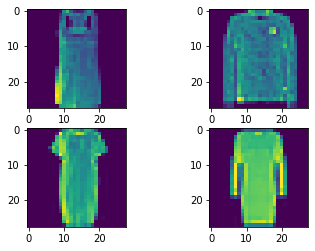

In [74]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(X_train[0])
ax[0][1].imshow(X_train[1])
ax[1][0].imshow(X_train[2])
ax[1][1].imshow(X_train[3])

## Learning rate schedules

Learning rate scehduling is a technical to gradualy descrease/increase learning rate during training. It normally can be done with a decay parameter in optimiser or can be defined as a callback function. The typicall scheduling are:

- Power Scheduling: lr(t) = lr(0) / (1 + t/s)^c (typically c is 0, and s is step)
- Exponential Scheduling: lr(t) = lr(0)*0.1^(t/s) (gradual drop by a factor of 10 every s steps)
- Piecewise constant scheduleing: use a constant learning rate for a number of epochs then reduce to a smaller one, and so on
- Performance schedulling: Measure the validation error every N steps and reduce rate by a factor of lambda when error stops dropping

In [76]:
from tensorflow.keras import activations, layers, initializers, callbacks, models
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU, BatchNormalization, ReLU, ELU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam, Nadam, Adamax

es_cb = EarlyStopping(patience=3, monitor='val_loss') # early stopping at min loss
md_cb = ModelCheckpoint("f_mnist_model_A.h5", save_best_only=True) # setup a model check point
tb_cb = TensorBoard(run_logdir()) # tensorboard check point

sgd_vanilla = SGD(lr = 1e-3) # stochastic gradient descent

keras.backend.clear_session()    
model = Sequential([
    Flatten(input_shape=[28, 28]),
    BatchNormalization(),
    Dense(300, activation = "relu"),
    Dense(300, activation = "relu"),
    Dense(300, activation = "relu"),
    Dense(10, activation = "softmax")
])
    
model.compile(optimizer =  opt, loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_data = (X_valid, y_valid), 
                    verbose = False)
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 0s 783us/step - loss: 0.3493 - accuracy: 0.8737
[0.3492662012577057, 0.8737000226974487]


In [68]:
##

7035